<a href="https://colab.research.google.com/github/dayudyah20/Belajar-Coursera/blob/main/2008541107_Dayu_Diah_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dm1


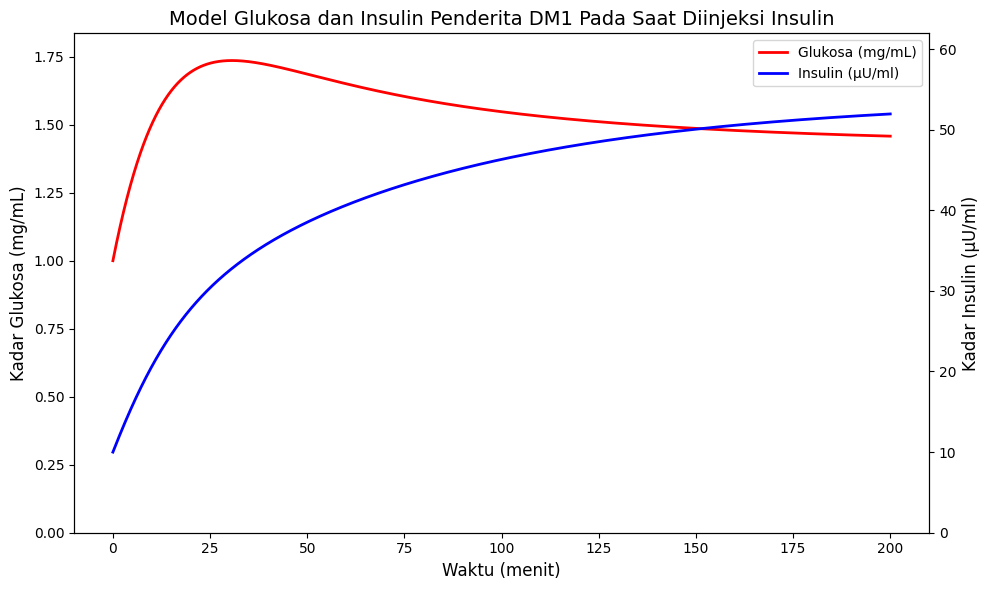

In [500]:
# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 13
gamma = 0.05
theta = 0.00075919
sigma = 1.54
beta = 0.0002
epsilon = 0.98

t = np.linspace(0, 200, 3000)
z0 = np.array([100.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Model Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()

In [501]:
import math

G_kritis_2 = (alpha * beta * epsilon - theta * sigma) / (beta * (gamma * epsilon - theta))
I_kritis_2 = (-alpha * beta + gamma * sigma) / (alpha * beta * epsilon - theta * sigma)

# Menampilkan Titik Kritis Kedua
print("Titik Kritis 2:")
print("G (Glukosa) =", G_kritis_2)
print("I (Insulin) =", I_kritis_2)

# Rumus bagian dalam akar kuadrat
term_inside_sqrt = (gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
                    theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
                    (alpha * beta * epsilon - theta * sigma) ** 3 +
                    sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta))

# Menghitung λ₁
lambda_1 = -((gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
              theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
              (alpha * beta * epsilon - theta * sigma) ** 3 +
              sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta)) /
             (2 * sigma * (epsilon * gamma - theta) ** 2 * (alpha * beta * epsilon - sigma * theta))) + \
           math.sqrt((term_inside_sqrt) ** 2 -
                     4 * sigma * (alpha * beta * epsilon - theta * sigma) ** 3 * (epsilon * gamma - theta) ** 3 * (-alpha * beta + gamma * sigma))

# Menghitung λ₂
lambda_2 = -((gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
              theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
              (alpha * beta * epsilon - theta * sigma) ** 3 +
              sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta)) /
             (2 * sigma * (epsilon * gamma - theta) ** 2 * (alpha * beta * epsilon - sigma * theta))) - \
           math.sqrt((term_inside_sqrt) ** 2 -
                     4 * sigma * (alpha * beta * epsilon - theta * sigma) ** 3 * (epsilon * gamma - theta) ** 3 * (-alpha * beta + gamma * sigma))

# Menampilkan hasil
print("Nilai Lambda 1 (λ₁):", lambda_1)
print("Nilai Lambda 2 (λ₂):", lambda_2)

Titik Kritis 2:
G (Glukosa) = 142.91296103858954
I (Insulin) = 53.958110230327144
Nilai Lambda 1 (λ₁): -0.05950781735083253
Nilai Lambda 2 (λ₂): -0.05950873608387295


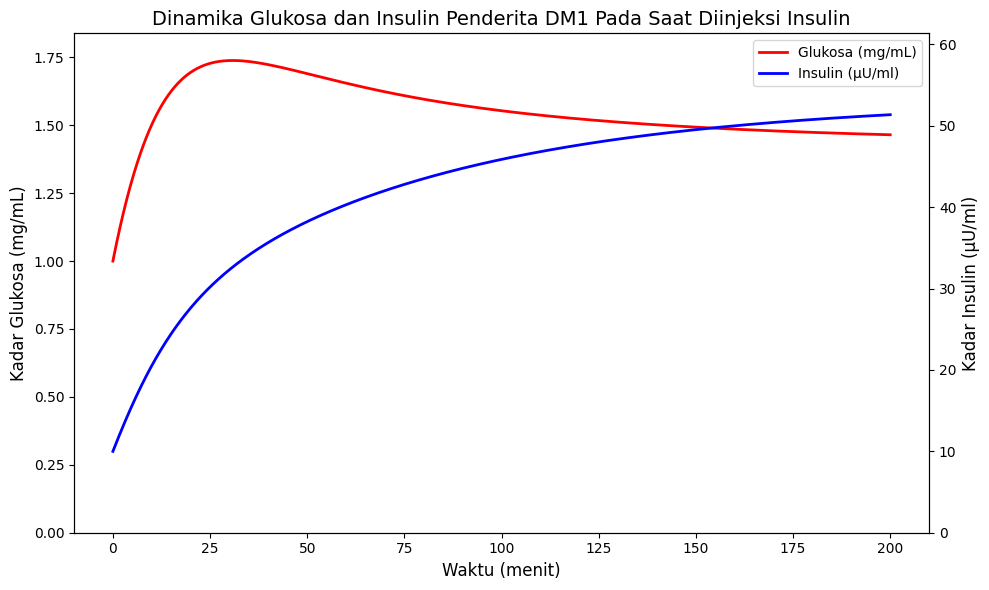

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 13
gamma = 0.05
theta = 0.00075919
sigma = 1.54
beta = 0.0002
epsilon = 0.98

t = np.linspace(0, 200, 3000)
z0 = np.array([100.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()


In [487]:
import math

G_kritis_2 = (alpha * beta * epsilon - theta * sigma) / (beta * (gamma * epsilon - theta))
I_kritis_2 = (-alpha * beta + gamma * sigma) / (alpha * beta * epsilon - theta * sigma)

# Menampilkan Titik Kritis Kedua
print("Titik Kritis 2:")
print("G (Glukosa) =", G_kritis_2)
print("I (Insulin) =", I_kritis_2)

# Rumus bagian dalam akar kuadrat
term_inside_sqrt = (gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
                    theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
                    (alpha * beta * epsilon - theta * sigma) ** 3 +
                    sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta))

# Menghitung λ₁
lambda_1 = -((gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
              theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
              (alpha * beta * epsilon - theta * sigma) ** 3 +
              sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta)) /
             (2 * sigma * (epsilon * gamma - theta) ** 2 * (alpha * beta * epsilon - sigma * theta))) + \
           math.sqrt((term_inside_sqrt) ** 2 -
                     4 * sigma * (alpha * beta * epsilon - theta * sigma) ** 3 * (epsilon * gamma - theta) ** 3 * (-alpha * beta + gamma * sigma))

# Menghitung λ₂
lambda_2 = -((gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
              theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
              (alpha * beta * epsilon - theta * sigma) ** 3 +
              sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta)) /
             (2 * sigma * (epsilon * gamma - theta) ** 2 * (alpha * beta * epsilon - sigma * theta))) - \
           math.sqrt((term_inside_sqrt) ** 2 -
                     4 * sigma * (alpha * beta * epsilon - theta * sigma) ** 3 * (epsilon * gamma - theta) ** 3 * (-alpha * beta + gamma * sigma))

# Menampilkan hasil
print("Nilai Lambda 1 (λ₁):", lambda_1)
print("Nilai Lambda 2 (λ₂):", lambda_2)

Titik Kritis 2:
G (Glukosa) = 150.89064200260094
I (Insulin) = 52.065747315446096
Nilai Lambda 1 (λ₁): -0.05456269412766998
Nilai Lambda 2 (λ₂): -0.05456315290480625


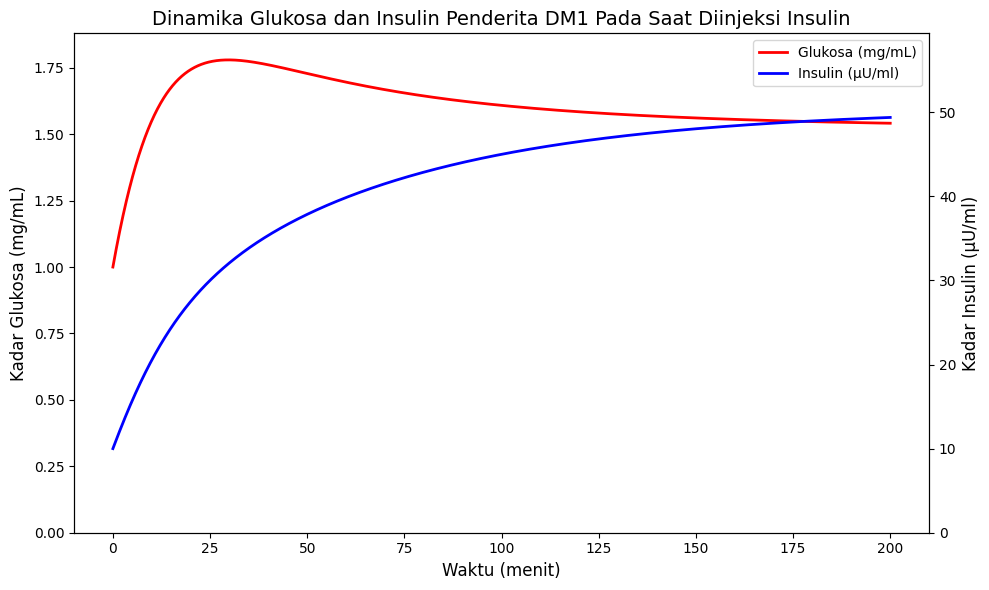

In [453]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 15
gamma = 0.06
theta = 0.00075919
sigma = 1.54
beta = 0.0002
epsilon = 0.98

t = np.linspace(0, 200, 3000)
z0 = np.array([100.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()

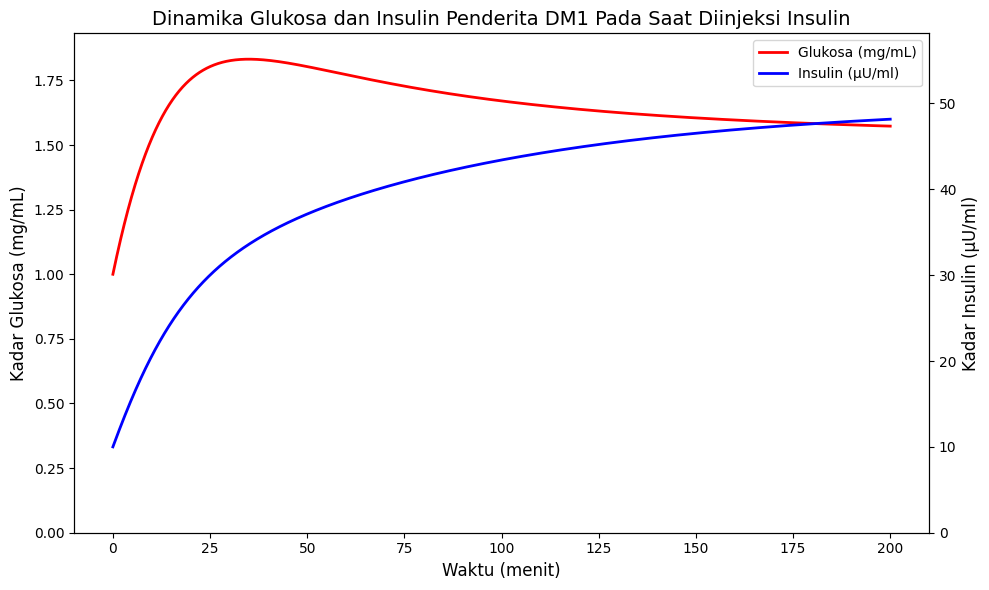

In [463]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 13
gamma = 0.05
theta = 0.00075919
sigma = 1.54
beta = 0.0002
epsilon = 0.99

t = np.linspace(0, 200, 3000)
z0 = np.array([100.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()


In [454]:
import math

G_kritis_2 = (alpha * beta * epsilon - theta * sigma) / (beta * (gamma * epsilon - theta))
I_kritis_2 = (-alpha * beta + gamma * sigma) / (alpha * beta * epsilon - theta * sigma)

# Menampilkan Titik Kritis Kedua
print("Titik Kritis 2:")
print("G (Glukosa) =", G_kritis_2)
print("I (Insulin) =", I_kritis_2)

# Rumus bagian dalam akar kuadrat
term_inside_sqrt = (gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
                    theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
                    (alpha * beta * epsilon - theta * sigma) ** 3 +
                    sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta))

# Menghitung λ₁
lambda_1 = -((gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
              theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
              (alpha * beta * epsilon - theta * sigma) ** 3 +
              sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta)) /
             (2 * sigma * (epsilon * gamma - theta) ** 2 * (alpha * beta * epsilon - sigma * theta))) + \
           math.sqrt((term_inside_sqrt) ** 2 -
                     4 * sigma * (alpha * beta * epsilon - theta * sigma) ** 3 * (epsilon * gamma - theta) ** 3 * (-alpha * beta + gamma * sigma))

# Menghitung λ₂
lambda_2 = -((gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
              theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
              (alpha * beta * epsilon - theta * sigma) ** 3 +
              sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta)) /
             (2 * sigma * (epsilon * gamma - theta) ** 2 * (alpha * beta * epsilon - sigma * theta))) - \
           math.sqrt((term_inside_sqrt) ** 2 -
                     4 * sigma * (alpha * beta * epsilon - theta * sigma) ** 3 * (epsilon * gamma - theta) ** 3 * (-alpha * beta + gamma * sigma))

# Menampilkan hasil
print("Nilai Lambda 1 (λ₁):", lambda_1)
print("Nilai Lambda 2 (λ₂):", lambda_2)

Titik Kritis 2:
G (Glukosa) = 152.55191993357778
I (Insulin) = 50.484304858792456
Nilai Lambda 1 (λ₁): -0.06411565802665972
Nilai Lambda 2 (λ₂): -0.06411743554046684


Simulasi model TK1 DIabetes Melitus fix banget

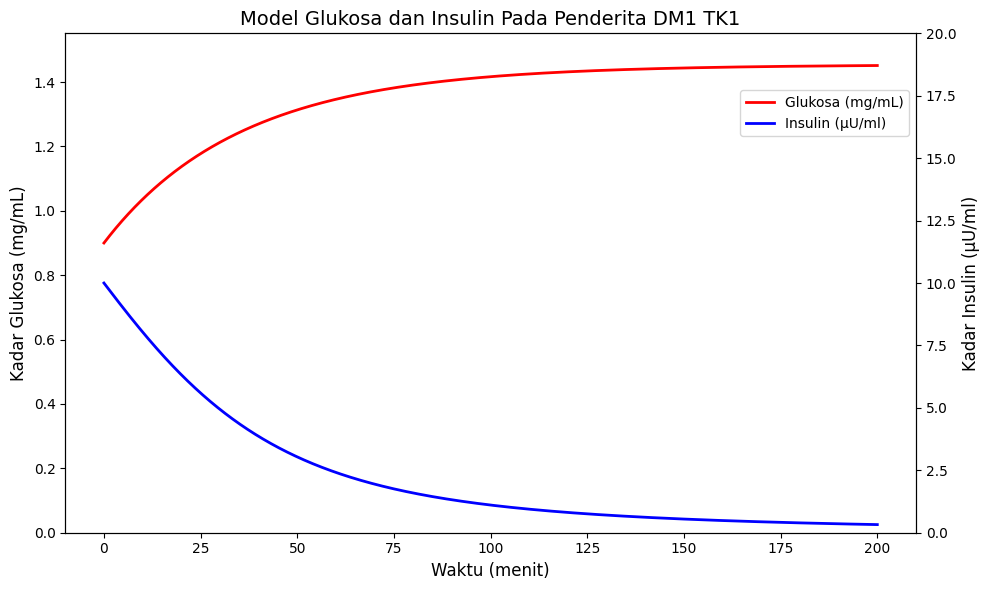

In [231]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 4.5
gamma = 0.0309
theta = 0.00016089
sigma = 0.04
beta = 0.0003
epsilon = 0.5

t = np.linspace(0, 200, 3000)
z0 = np.array([90.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10, bbox_to_anchor=(1.0, 0.9))

plt.title('Model Glukosa dan Insulin Pada Penderita DM1 TK1', fontsize=14)
plt.tight_layout()
plt.show()

In [232]:
# Titik Kritis 1
G_kritis = alpha / gamma
I_kritis = 0  # Insulin pada titik kritis adalah 0

# Menampilkan titik kritis pertama
print("Titik Kritis 1:")
print("G (Glukosa) =", G_kritis)
print("I (Insulin) =", I_kritis)

# Hitung Nilai Eigen
lambda_1 = -gamma
lambda_2 = (sigma * gamma - beta * alpha) / gamma

print("\nNilai Eigen 1 (λ_1):", lambda_1)
print("Nilai Eigen 2 (λ_2):", lambda_2)

Titik Kritis 1:
G (Glukosa) = 145.63106796116506
I (Insulin) = 0

Nilai Eigen 1 (λ_1): -0.0309
Nilai Eigen 2 (λ_2): -0.003689320388349506


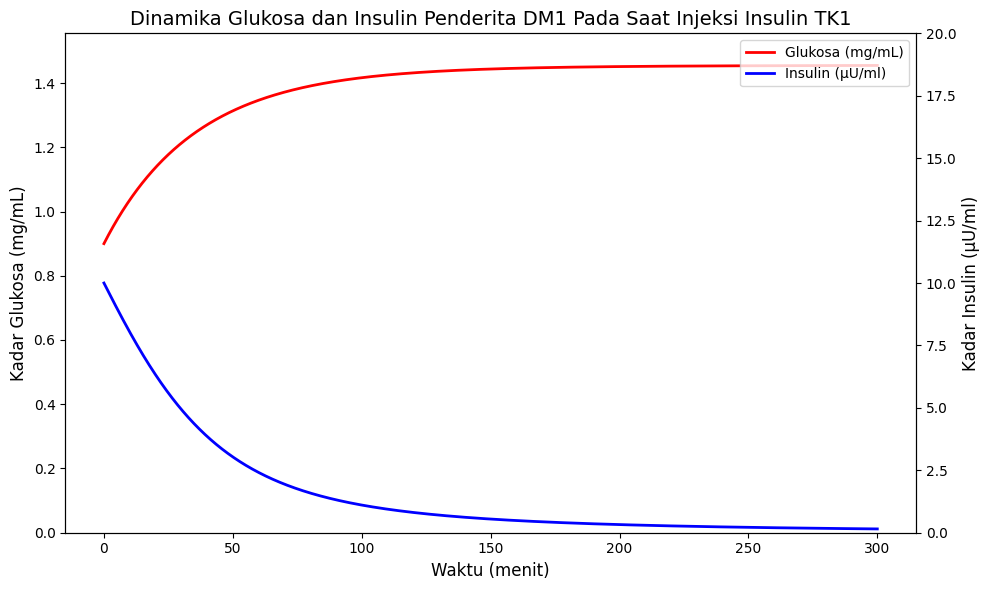

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 4.5
gamma = 0.0309
theta = 0.00016089
sigma = 0.04
beta = 0.0003
epsilon = 0.5

t = np.linspace(0, 300, 3000)
z0 = np.array([90.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Injeksi Insulin TK1', fontsize=14)
plt.tight_layout()
plt.show()

Simulasi Model Orang Normal

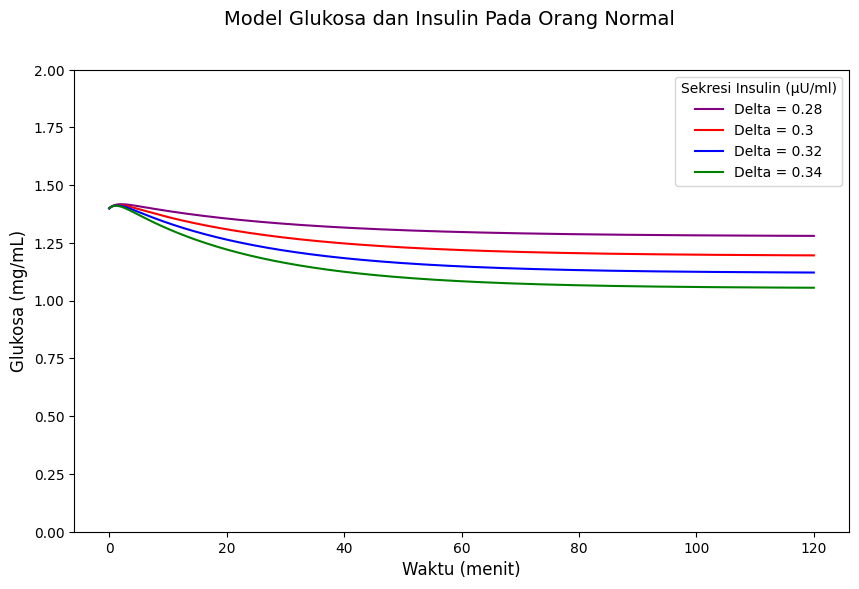

In [230]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi model glukosa-insulin
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I      # perubahan kadar glukosa
    dIdt = delta * G - beta * I * G               # perubahan kadar insulin
    return np.array([dGdt, dIdt])

# Fungsi Runge-Kutta orde 4 (versi dinamis dengan h)
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5 * h * k1, t[i-1] + 0.5 * h, *params)
        k3 = f(z[i-1] + 0.5 * h * k2, t[i-1] + 0.5 * h, *params)
        k4 = f(z[i-1] + h * k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return z

# Parameter model tetap
alpha = 4.5
gamma = 0.0002
theta = 0.00075
beta = 0.006

# Rentang waktu simulasi
t = np.linspace(0, 120, 3000)

# Variasi delta yang ingin diuji
delta_list = [0.28, 0.3, 0.32, 0.34 ]
colors = ['purple','red', 'blue', 'green', 'black']

fig, ax1 = plt.subplots(figsize=(10, 6))

for i, delta in enumerate(delta_list):
    z0 = [140.0, 20.0]  # Kondisi awal Glukosa (mg/dL) dan Insulin
    params = (alpha, gamma, theta, delta, beta)
    solution = runge_kutta_4(f, z0, t, params)

    glucose = solution[:, 0] / 100  # Ubah glukosa dari mg/dL ke mg/mL

    ax1.plot(t, glucose, color=colors[i],
             label=f'Delta = {delta}',
             linestyle='dotted' if delta == 0 else '-')

ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Glukosa (mg/mL)', color='black', fontsize=12)
ax1.set_ylim(0, 2)  # Disesuaikan karena sudah dalam mg/mL
ax1.legend(loc="upper right", title="Sekresi Insulin (μU/ml)", fontsize=10)

fig.suptitle('Model Glukosa dan Insulin Pada Orang Normal', fontsize=14)
plt.show()

Perhitungan Titik Kesetimbangan dan Nilai Eigen untuk tiap Delta:
------------------------------------------------------------
 Delta |       G_eq |       I_eq |   Lambda_1 |   Lambda_2
------------------------------------------------------------
  0.28 |     127.84 |      46.67 |    -0.0352 |    -0.7670
  0.30 |     119.36 |      50.00 |    -0.0377 |    -0.7162
  0.32 |     111.94 |      53.33 |    -0.0402 |    -0.6716
  0.34 |     105.39 |      56.67 |    -0.0427 |    -0.6323


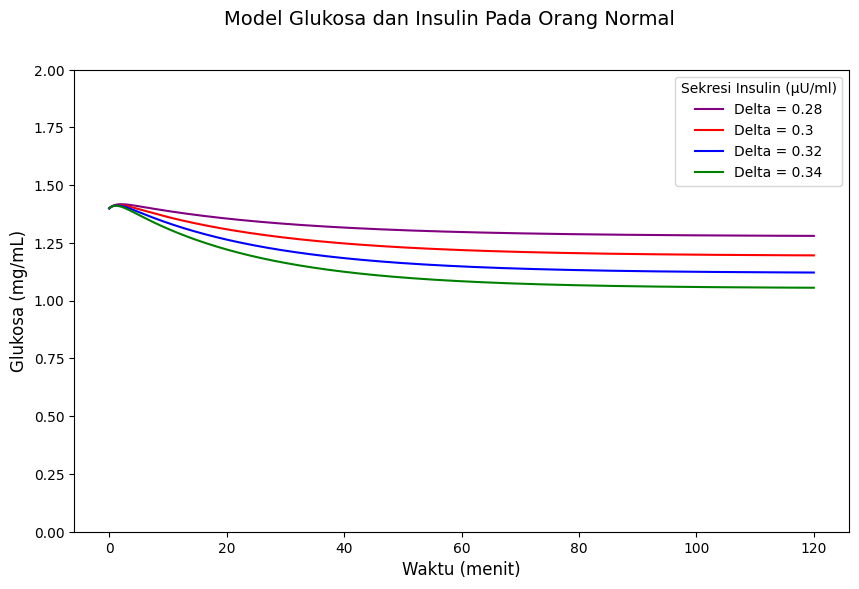

In [229]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi model glukosa-insulin
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I       # perubahan kadar glukosa
    dIdt = delta * G - beta * I * G                # perubahan kadar insulin
    return np.array([dGdt, dIdt])

# Fungsi Runge-Kutta orde 4 (versi dinamis dengan h)
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5 * h * k1, t[i-1] + 0.5 * h, *params)
        k3 = f(z[i-1] + 0.5 * h * k2, t[i-1] + 0.5 * h, *params)
        k4 = f(z[i-1] + h * k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return z

# Parameter tetap
alpha = 4.5
gamma = 0.0002
theta = 0.00075
beta = 0.006

# Rentang waktu simulasi
t = np.linspace(0, 120, 3000)

# Variasi delta yang ingin diuji
delta_list = [0.28, 0.3, 0.32, 0.34]
colors = ['purple', 'red', 'blue', 'green']

fig, ax1 = plt.subplots(figsize=(10, 6))

print("Perhitungan Titik Kesetimbangan dan Nilai Eigen untuk tiap Delta:")
print("-" * 60)
print(f"{'Delta':>6} | {'G_eq':>10} | {'I_eq':>10} | {'Lambda_1':>10} | {'Lambda_2':>10}")
print("-" * 60)

for i, delta in enumerate(delta_list):
    # Hitung titik kesetimbangan
    denom = beta * gamma + delta * theta
    G_eq = (alpha * beta) / denom
    I_eq = delta / beta

    # Hitung nilai eigen
    lambda_1 = (-(beta * gamma) - (theta * delta)) / beta
    lambda_2 = -(alpha * beta**2) / denom

    print(f"{delta:6.2f} | {G_eq:10.2f} | {I_eq:10.2f} | {lambda_1:10.4f} | {lambda_2:10.4f}")

    # Simulasi dengan Runge-Kutta orde 4
    z0 = [140.0, 20.0]  # Kondisi awal Glukosa (mg/dL) dan Insulin
    params = (alpha, gamma, theta, delta, beta)
    solution = runge_kutta_4(f, z0, t, params)

    glucose = solution[:, 0] / 100  # konversi mg/dL ke mg/mL untuk plot

    ax1.plot(t, glucose, color=colors[i], label=f'Delta = {delta}', linestyle='-')

ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Glukosa (mg/mL)', color='black', fontsize=12)
ax1.set_ylim(0, 2)  # menyesuaikan skala glukosa mg/mL
ax1.legend(loc="upper right", title="Sekresi Insulin (μU/ml)", fontsize=10)

fig.suptitle('Model Glukosa dan Insulin Pada Orang Normal', fontsize=14)
plt.show()


In [3]:
# Menghitung titik kesetimbangan berdasarkan formula yang diberikan
G_eq = alpha * beta / (beta * gamma + delta * theta)
I_eq = delta / beta

# Menghitung nilai eigen berdasarkan formula yang diberikan
lambda_1 = (-(beta * gamma) - (theta * delta)) / beta
lambda_2 = -(alpha * beta**2) / (beta * gamma + delta * theta)

# Menampilkan titik kesetimbangan dan nilai eigen
print(f"Titik Kesetimbangan: G = {G_eq:.2f}, I = {I_eq:.2f}")
print(f"Nilai Eigen: \u03bb_1 = {lambda_1:.2f}, \u03bb_2 = {lambda_2:.2f}")


Titik Kesetimbangan: G = 102.39, I = 58.33
Nilai Eigen: λ_1 = -0.04, λ_2 = -0.61


simulasi dm1

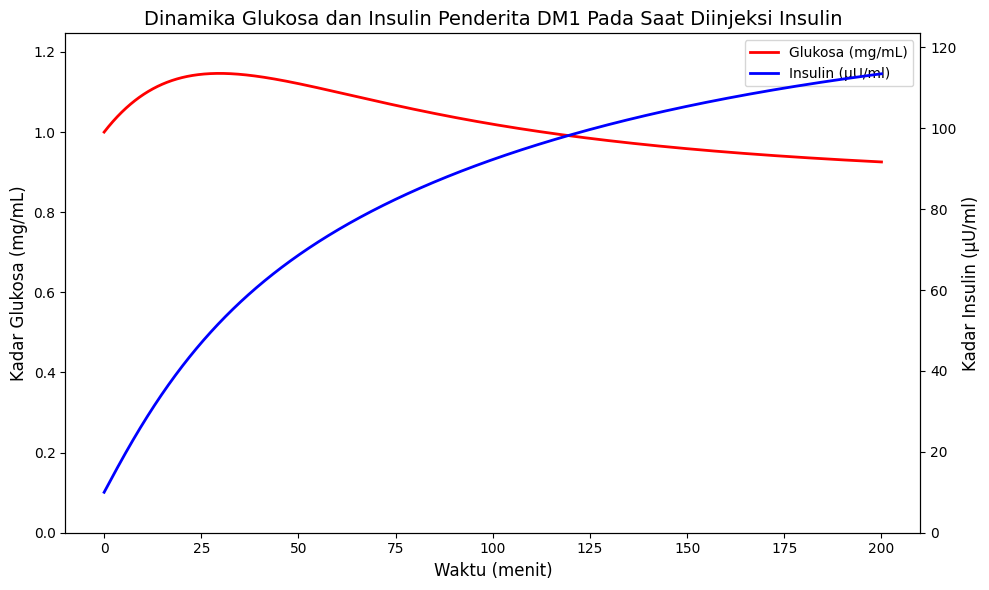

In [401]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 4.5
gamma = 0.0309
theta = 0.00016089
sigma = 1.8
beta = 0.0002
epsilon = 0.8

t = np.linspace(0, 200, 3000)
z0 = np.array([100.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()


coba

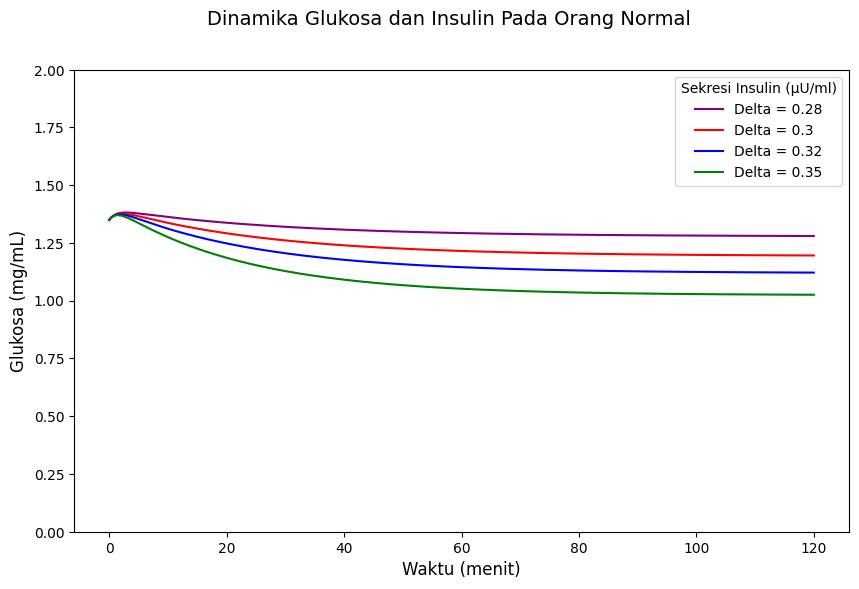

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi model glukosa-insulin
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I      # perubahan kadar glukosa
    dIdt = delta * G - beta * I * G               # perubahan kadar insulin
    return np.array([dGdt, dIdt])

# Fungsi Runge-Kutta orde 4 (versi dinamis dengan h)
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5 * h * k1, t[i-1] + 0.5 * h, *params)
        k3 = f(z[i-1] + 0.5 * h * k2, t[i-1] + 0.5 * h, *params)
        k4 = f(z[i-1] + h * k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return z

# Parameter model tetap
alpha = 4.5
gamma = 0.0002
theta = 0.00075
beta = 0.006

# Rentang waktu simulasi
t = np.linspace(0, 120, 3000)

# Variasi delta yang ingin diuji
delta_list = [0.28, 0.3, 0.32, 0.35 ]
colors = ['purple','red', 'blue', 'green', 'black']

fig, ax1 = plt.subplots(figsize=(10, 6))

for i, delta in enumerate(delta_list):
    z0 = [135.0, 10.0]  # Kondisi awal Glukosa (mg/dL) dan Insulin
    params = (alpha, gamma, theta, delta, beta)
    solution = runge_kutta_4(f, z0, t, params)

    glucose = solution[:, 0] / 100  # Ubah glukosa dari mg/dL ke mg/mL

    ax1.plot(t, glucose, color=colors[i],
             label=f'Delta = {delta}',
             linestyle='dotted' if delta == 0 else '-')

ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Glukosa (mg/mL)', color='black', fontsize=12)
ax1.set_ylim(0, 2)  # Disesuaikan karena sudah dalam mg/mL
ax1.legend(loc="upper right", title="Sekresi Insulin (μU/ml)", fontsize=10)

fig.suptitle('Dinamika Glukosa dan Insulin Pada Orang Normal', fontsize=14)
plt.show()

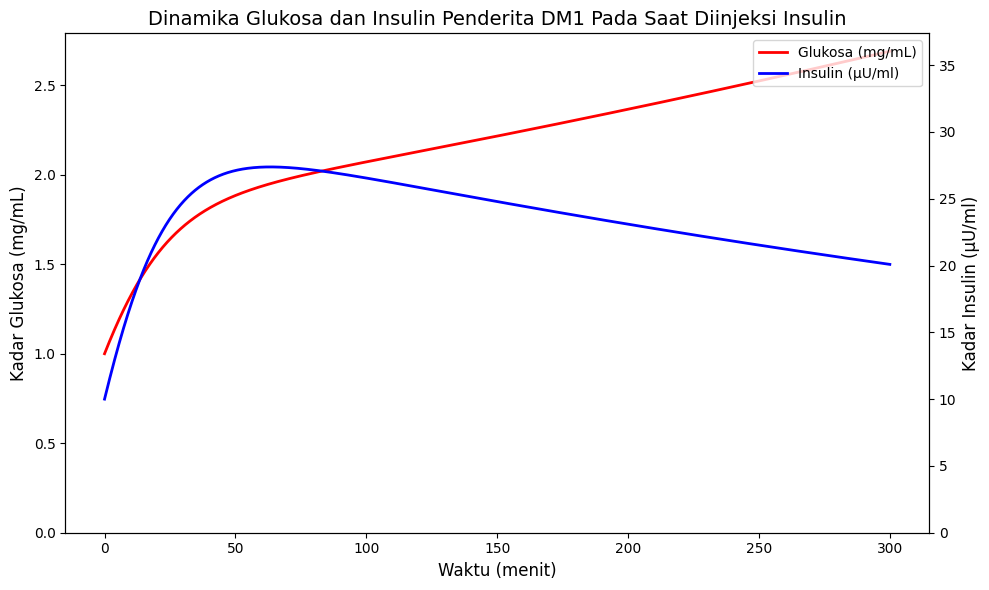

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 4.5               # mg/dL*min, laju pemasukan glukosa
gamma = 0.0004            # naikkan sedikit
theta = 0.00075            # naikkan sedikit
sigma = 1.0               # tetap
beta = 0.0002             # tetap
epsilon = 0.9             # tetap

t = np.linspace(0, 300, 3000)
z0 = np.array([100.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()

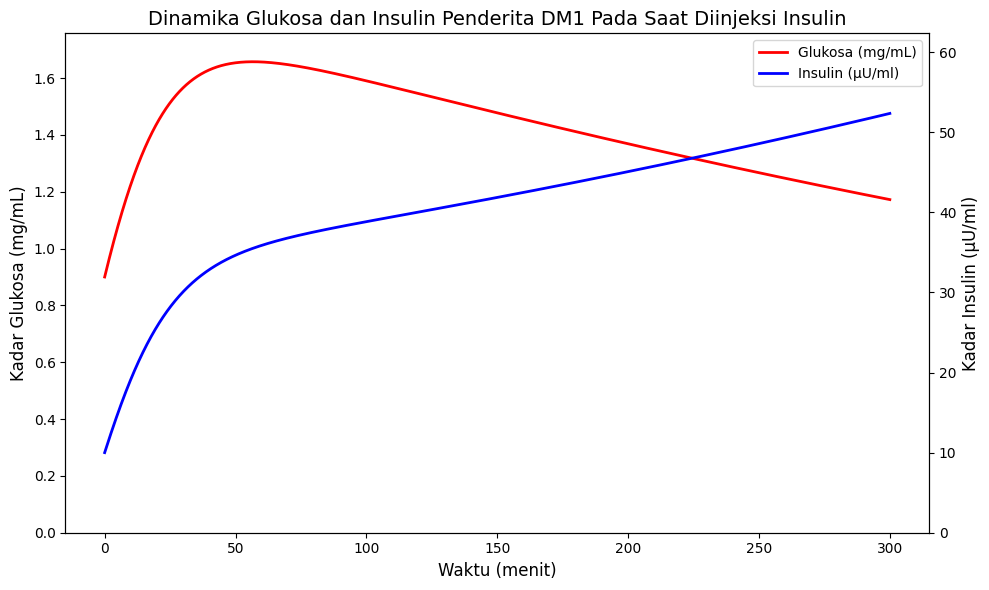

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 4.5               # mg/dL*min, laju pemasukan glukosa
gamma = 0.0002            # naikkan sedikit
theta = 0.000759            # naikkan sedikit
sigma = 1.2              # tetap
beta = 0.0002             # tetap
epsilon = 0.9             # tetap

t = np.linspace(0, 300, 3000)
z0 = np.array([90.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()

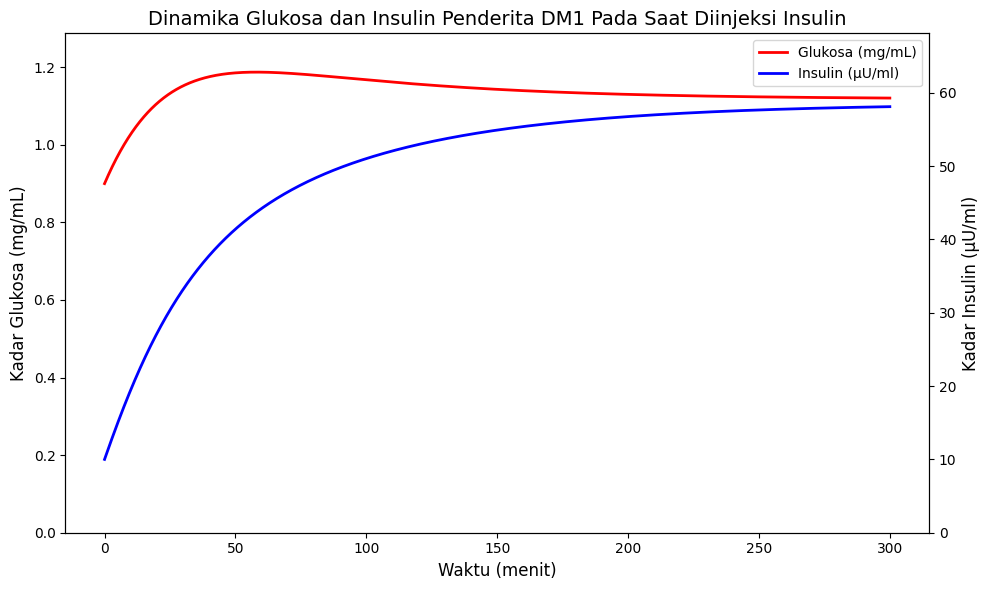

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 4.5               # mg/dL*min, laju pemasukan glukosa
gamma = 0.0309            # naikkan sedikit
theta = 0.000160            # naikkan sedikit
sigma = 1.2              # tetap
beta = 0.0002             # tetap
epsilon = 0.9             # tetap

t = np.linspace(0, 300, 3000)
z0 = np.array([90.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()

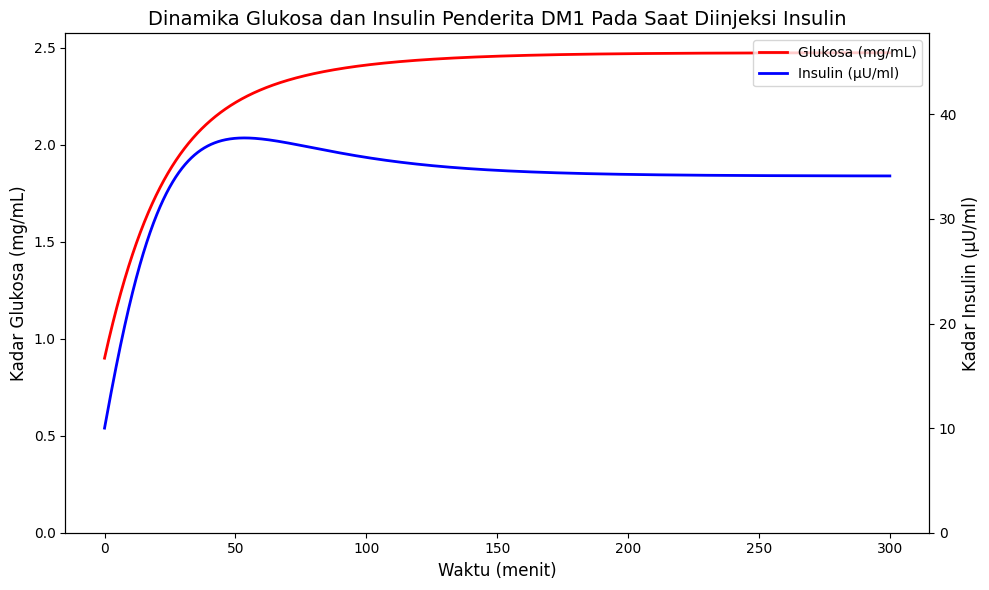

In [452]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 9             # mg/dL*min, laju pemasukan glukosa
gamma = 0.0309            # naikkan sedikit
theta = 0.000160            # naikkan sedikit
sigma = 1.4              # tetap
beta = 0.0002             # tetap
epsilon = 0.8             # tetap

t = np.linspace(0, 300, 3000)
z0 = np.array([90.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()

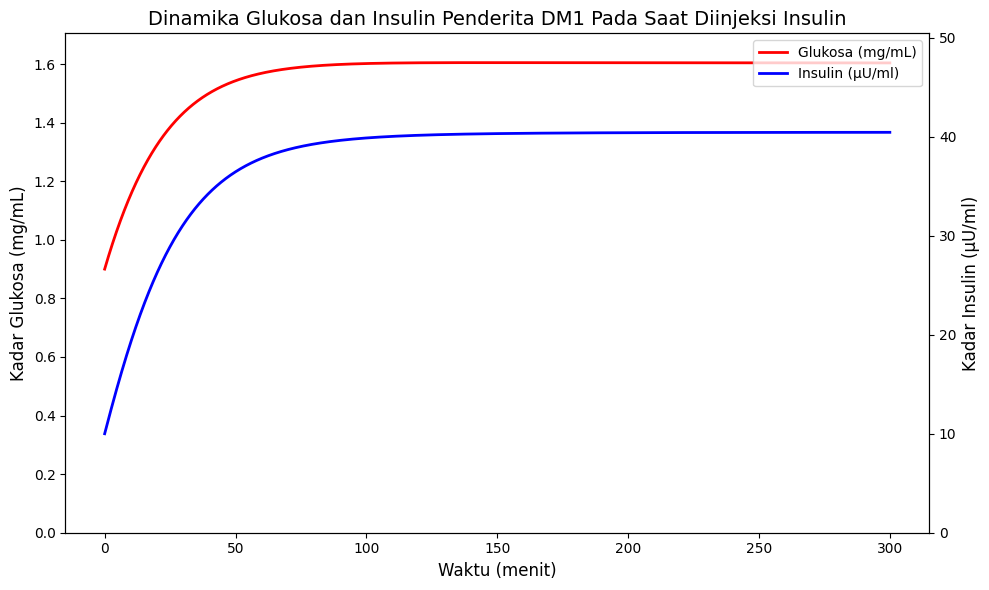

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 6               # mg/dL*min, laju pemasukan glukosa
gamma = 0.0309            # naikkan sedikit
theta = 0.00016089            # naikkan sedikit
sigma = 1.2              # tetap
beta = 0.0002             # tetap
epsilon = 0.9             # tetap

t = np.linspace(0, 300, 3000)
z0 = np.array([90.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()

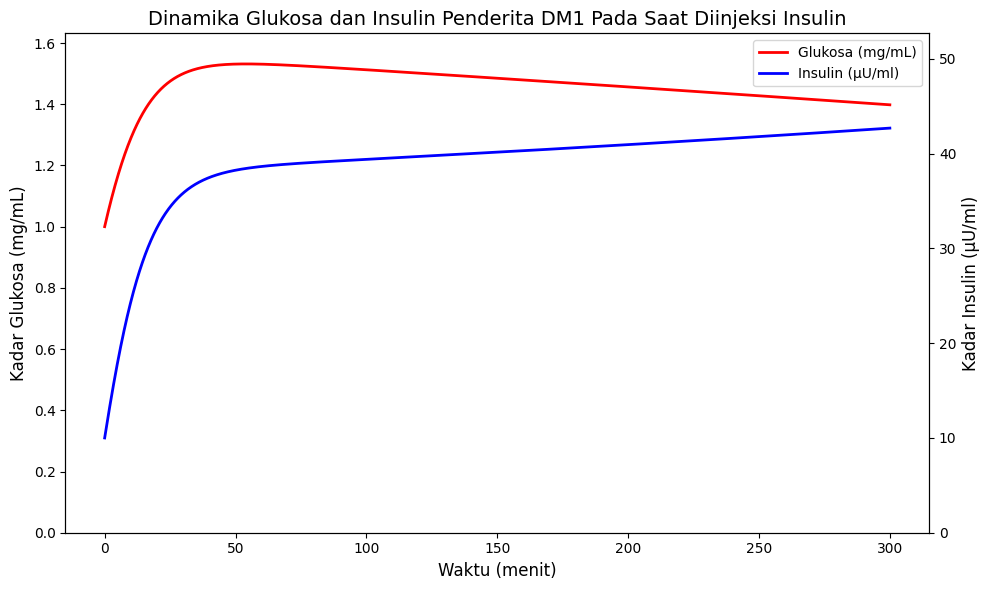

In [129]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 4.5               # mg/dL*min, laju pemasukan glukosa
gamma = 0.0002            # naikkan sedikit
theta = 0.00075919           # naikkan sedikit
sigma = 1.5             # tetap
beta = 0.0004             # tetap
epsilon = 0.6           # tetap

t = np.linspace(0, 300, 3000)
z0 = np.array([100.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()

In [130]:
import math

G_kritis_2 = (alpha * beta * epsilon - theta * sigma) / (beta * (gamma * epsilon - theta))
I_kritis_2 = (-alpha * beta + gamma * sigma) / (alpha * beta * epsilon - theta * sigma)

# Menampilkan Titik Kritis Kedua
print("Titik Kritis 2:")
print("G (Glukosa) =", G_kritis_2)
print("I (Insulin) =", I_kritis_2)

# Rumus bagian dalam akar kuadrat
term_inside_sqrt = (gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
                    theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
                    (alpha * beta * epsilon - theta * sigma) ** 3 +
                    sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta))

# Menghitung λ₁
lambda_1 = -((gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
              theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
              (alpha * beta * epsilon - theta * sigma) ** 3 +
              sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta)) /
             (2 * sigma * (epsilon * gamma - theta) ** 2 * (alpha * beta * epsilon - sigma * theta))) + \
           math.sqrt((term_inside_sqrt) ** 2 -
                     4 * sigma * (alpha * beta * epsilon - theta * sigma) ** 3 * (epsilon * gamma - theta) ** 3 * (-alpha * beta + gamma * sigma))

# Menghitung λ₂
lambda_2 = -((gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
              theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
              (alpha * beta * epsilon - theta * sigma) ** 3 +
              sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta)) /
             (2 * sigma * (epsilon * gamma - theta) ** 2 * (alpha * beta * epsilon - sigma * theta))) - \
           math.sqrt((term_inside_sqrt) ** 2 -
                     4 * sigma * (alpha * beta * epsilon - theta * sigma) ** 3 * (epsilon * gamma - theta) ** 3 * (-alpha * beta + gamma * sigma))

# Menampilkan hasil
print("Nilai Lambda 1 (λ₁):", lambda_1)
print("Nilai Lambda 2 (λ₂):", lambda_2)

Titik Kritis 2:
G (Glukosa) = 229.91989862169305
I (Insulin) = 25.516713447307986
Nilai Lambda 1 (λ₁): -0.05295062803977438
Nilai Lambda 2 (λ₂): -0.05295062804752894


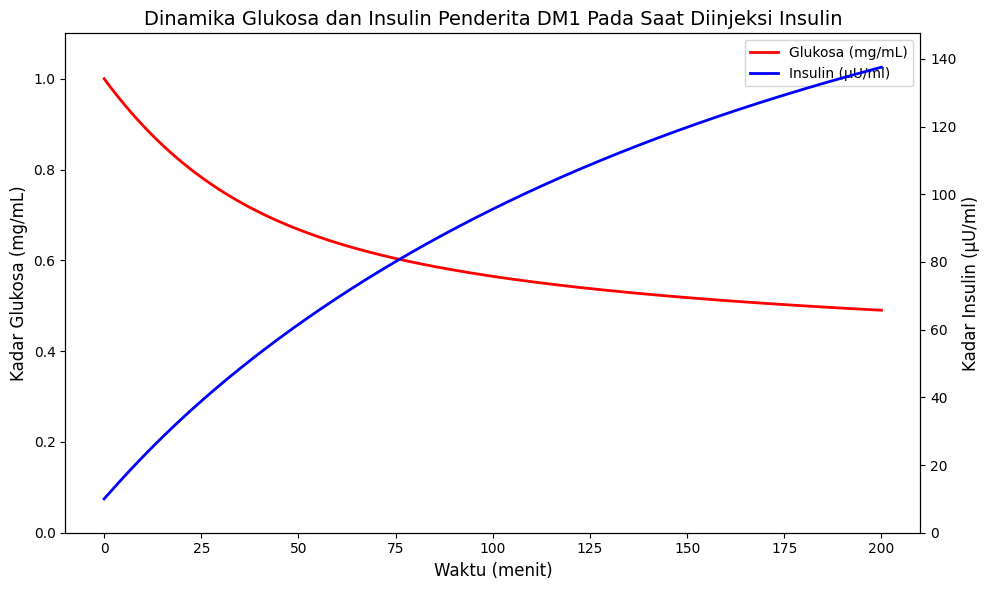

In [364]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 3
gamma = 0.04
theta = 0.00016089
sigma = 1.5
beta = 0.0002
epsilon = 0.9

t = np.linspace(0, 200, 3000)
z0 = np.array([100.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()


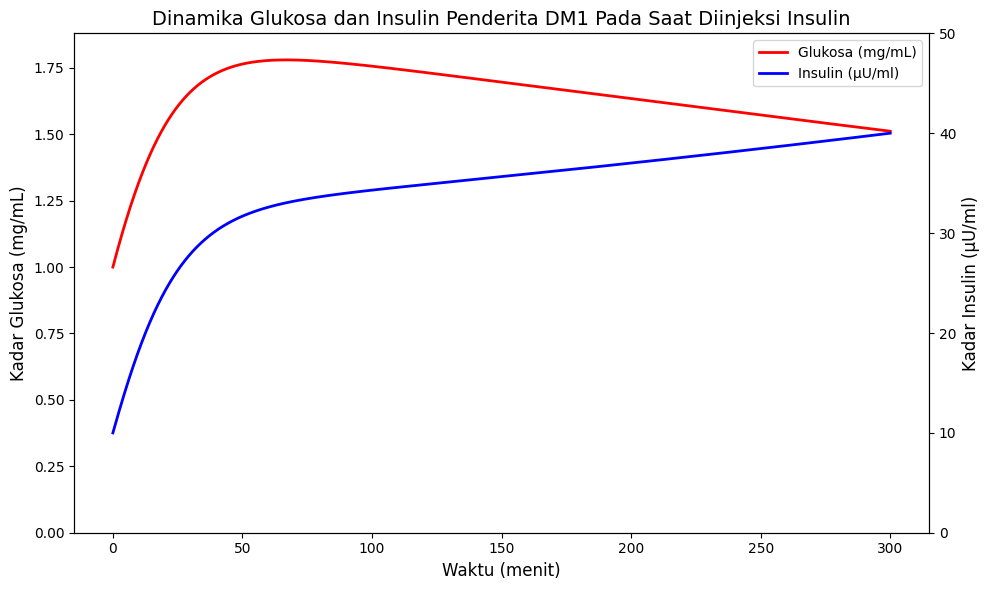

In [365]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 4.5
gamma = 0.0002
theta = 0.000759
sigma = 0.9
beta = 0.0002
epsilon = 0.7

# Parameter
#alpha = 18.2
#gamma = 0.08
#theta = 0.0009
#sigma = 1.54
#beta = 0.0002
#epsilon = 0.98

t = np.linspace(0, 300, 3000)
z0 = np.array([100.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()

In [366]:
import math

G_kritis_2 = (alpha * beta * epsilon - theta * sigma) / (beta * (gamma * epsilon - theta))
I_kritis_2 = (-alpha * beta + gamma * sigma) / (alpha * beta * epsilon - theta * sigma)

# Menampilkan Titik Kritis Kedua
print("Titik Kritis 2:")
print("G (Glukosa) =", G_kritis_2)
print("I (Insulin) =", I_kritis_2)

# Rumus bagian dalam akar kuadrat
term_inside_sqrt = (gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
                    theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
                    (alpha * beta * epsilon - theta * sigma) ** 3 +
                    sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta))

# Menghitung λ₁
lambda_1 = -((gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
              theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
              (alpha * beta * epsilon - theta * sigma) ** 3 +
              sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta)) /
             (2 * sigma * (epsilon * gamma - theta) ** 2 * (alpha * beta * epsilon - sigma * theta))) + \
           math.sqrt((term_inside_sqrt) ** 2 -
                     4 * sigma * (alpha * beta * epsilon - theta * sigma) ** 3 * (epsilon * gamma - theta) ** 3 * (-alpha * beta + gamma * sigma))

# Menghitung λ₂
lambda_2 = -((gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
              theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
              (alpha * beta * epsilon - theta * sigma) ** 3 +
              sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta)) /
             (2 * sigma * (epsilon * gamma - theta) ** 2 * (alpha * beta * epsilon - sigma * theta))) - \
           math.sqrt((term_inside_sqrt) ** 2 -
                     4 * sigma * (alpha * beta * epsilon - theta * sigma) ** 3 * (epsilon * gamma - theta) ** 3 * (-alpha * beta + gamma * sigma))

# Menampilkan hasil
print("Nilai Lambda 1 (λ₁):", lambda_1)
print("Nilai Lambda 2 (λ₂):", lambda_2)

Titik Kritis 2:
G (Glukosa) = 428.9176090468501
I (Insulin) = 13.559322033898296
Nilai Lambda 1 (λ₁): -0.04404929438489756
Nilai Lambda 2 (λ₂): -0.04404929438818052


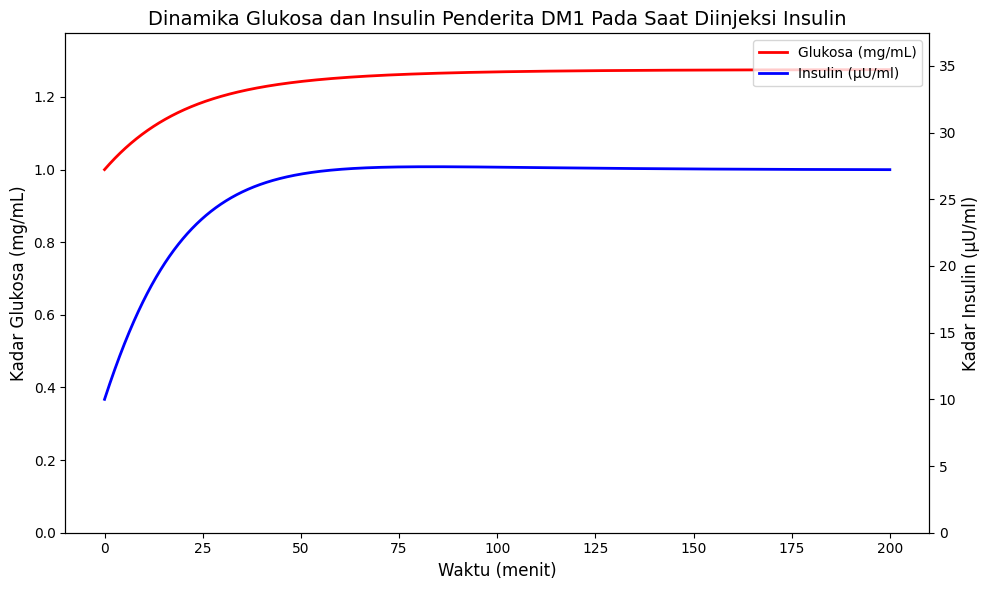

In [191]:
alpha = 18.4
gamma = 0.08
theta = 0.000759
sigma = 1.54
beta = 0.0002
epsilon = 0.98

In [155]:
import math

G_kritis_2 = (alpha * beta * epsilon - theta * sigma) / (beta * (gamma * epsilon - theta))
I_kritis_2 = (-alpha * beta + gamma * sigma) / (alpha * beta * epsilon - theta * sigma)

# Menampilkan Titik Kritis Kedua
print("Titik Kritis 2:")
print("G (Glukosa) =", G_kritis_2)
print("I (Insulin) =", I_kritis_2)

# Rumus bagian dalam akar kuadrat
term_inside_sqrt = (gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
                    theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
                    (alpha * beta * epsilon - theta * sigma) ** 3 +
                    sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta))

# Menghitung λ₁
lambda_1 = -((gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
              theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
              (alpha * beta * epsilon - theta * sigma) ** 3 +
              sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta)) /
             (2 * sigma * (epsilon * gamma - theta) ** 2 * (alpha * beta * epsilon - sigma * theta))) + \
           math.sqrt((term_inside_sqrt) ** 2 -
                     4 * sigma * (alpha * beta * epsilon - theta * sigma) ** 3 * (epsilon * gamma - theta) ** 3 * (-alpha * beta + gamma * sigma))

# Menghitung λ₂
lambda_2 = -((gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
              theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
              (alpha * beta * epsilon - theta * sigma) ** 3 +
              sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta)) /
             (2 * sigma * (epsilon * gamma - theta) ** 2 * (alpha * beta * epsilon - sigma * theta))) - \
           math.sqrt((term_inside_sqrt) ** 2 -
                     4 * sigma * (alpha * beta * epsilon - theta * sigma) ** 3 * (epsilon * gamma - theta) ** 3 * (-alpha * beta + gamma * sigma))

# Menampilkan hasil
print("Nilai Lambda 1 (λ₁):", lambda_1)
print("Nilai Lambda 2 (λ₂):", lambda_2)

Titik Kritis 2:
G (Glukosa) = -912.6110124333906
I (Insulin) = -6.760088231477892
Nilai Lambda 1 (λ₁): 0.16369389024396136
Nilai Lambda 2 (λ₂): 0.1636938901948662


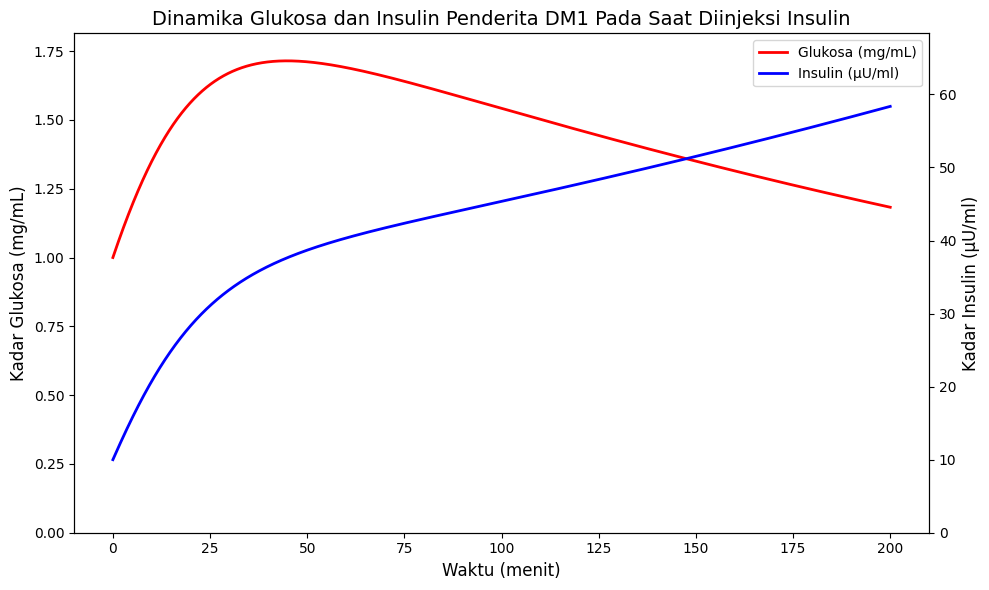

In [197]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 5
gamma = 0.0006
theta = 0.000759
sigma = 1.52
beta = 0.0002
epsilon = 0.98

t = np.linspace(0, 200, 3000)
z0 = np.array([100.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()


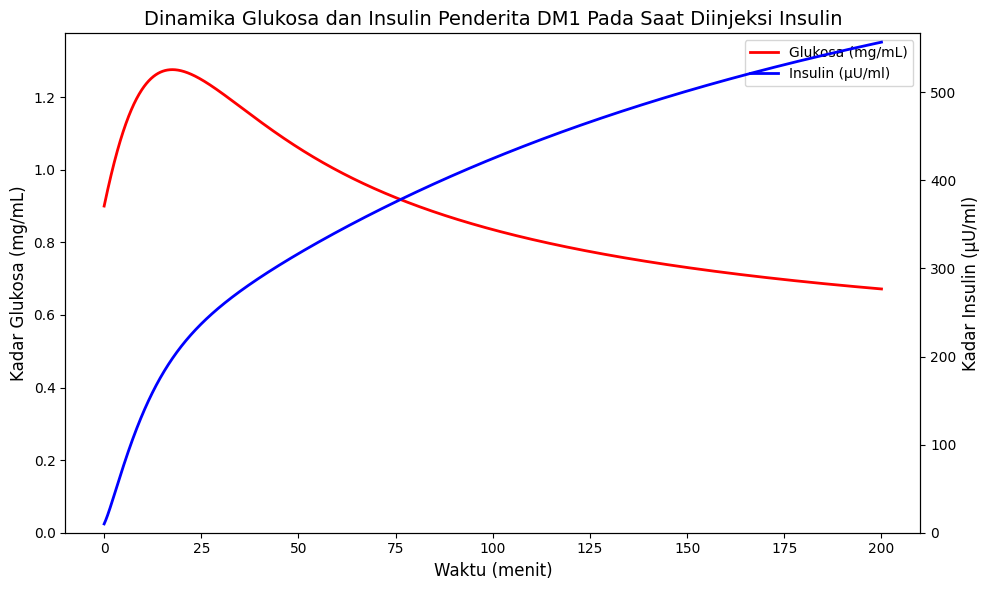

In [274]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 8
gamma = 0.0309
theta = 0.00016089
sigma = 2.0
beta = 0.0005
epsilon = 0.1


t = np.linspace(0, 200, 3000)
z0 = np.array([90.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()

In [271]:
import math

G_kritis_2 = (alpha * beta * epsilon - theta * sigma) / (beta * (gamma * epsilon - theta))
I_kritis_2 = (-alpha * beta + gamma * sigma) / (alpha * beta * epsilon - theta * sigma)

# Menampilkan Titik Kritis Kedua
print("Titik Kritis 2:")
print("G (Glukosa) =", G_kritis_2)
print("I (Insulin) =", I_kritis_2)

# Rumus bagian dalam akar kuadrat
term_inside_sqrt = (gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
                    theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
                    (alpha * beta * epsilon - theta * sigma) ** 3 +
                    sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta))

# Menghitung λ₁
lambda_1 = -((gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
              theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
              (alpha * beta * epsilon - theta * sigma) ** 3 +
              sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta)) /
             (2 * sigma * (epsilon * gamma - theta) ** 2 * (alpha * beta * epsilon - sigma * theta))) + \
           math.sqrt((term_inside_sqrt) ** 2 -
                     4 * sigma * (alpha * beta * epsilon - theta * sigma) ** 3 * (epsilon * gamma - theta) ** 3 * (-alpha * beta + gamma * sigma))

# Menghitung λ₂
lambda_2 = -((gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
              theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
              (alpha * beta * epsilon - theta * sigma) ** 3 +
              sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta)) /
             (2 * sigma * (epsilon * gamma - theta) ** 2 * (alpha * beta * epsilon - sigma * theta))) - \
           math.sqrt((term_inside_sqrt) ** 2 -
                     4 * sigma * (alpha * beta * epsilon - theta * sigma) ** 3 * (epsilon * gamma - theta) ** 3 * (-alpha * beta + gamma * sigma))

# Menampilkan hasil
print("Nilai Lambda 1 (λ₁):", lambda_1)
print("Nilai Lambda 2 (λ₂):", lambda_2)

Titik Kritis 2:
G (Glukosa) = 189.0621434107644
I (Insulin) = 38.06863832880591
Nilai Lambda 1 (λ₁): -0.04606740266162547
Nilai Lambda 2 (λ₂): -0.04606760134912717


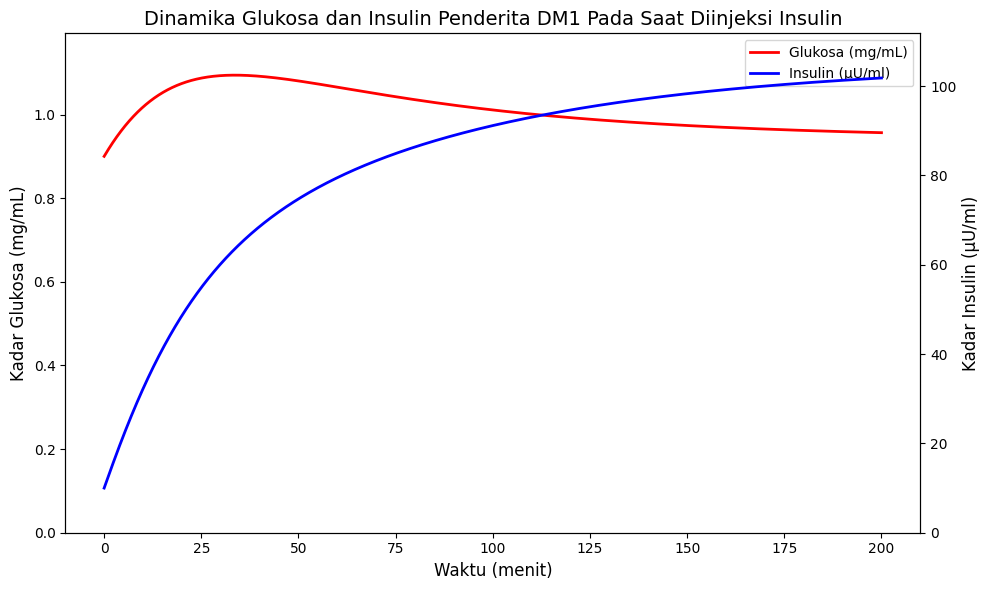

In [280]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 4.5
gamma = 0.0309
theta = 0.00016089
sigma = 3
beta = 0.0003
epsilon = 1.0


t = np.linspace(0, 200, 3000)
z0 = np.array([90.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()


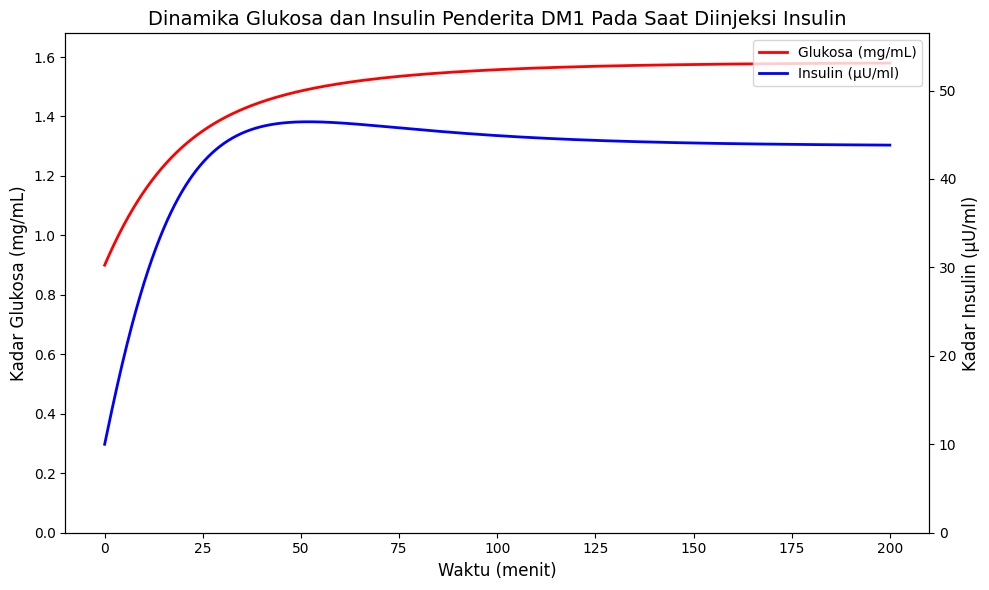

In [352]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 4.5
gamma = 0.0309
theta = 0.00016089
sigma = 2
beta = 0.0004
epsilon = 0.7


t = np.linspace(0, 200, 3000)
z0 = np.array([90.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()

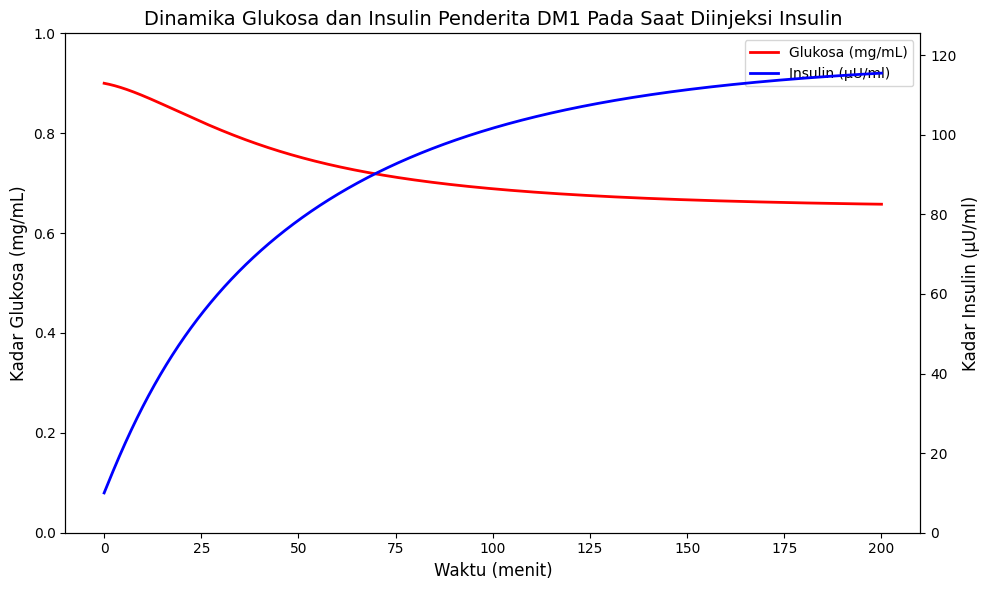

In [353]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 4.5
gamma = 0.05
theta = 0.00016089
sigma = 2.5
beta = 0.0004
epsilon = 0.8


t = np.linspace(0, 200, 3000)
z0 = np.array([90.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()

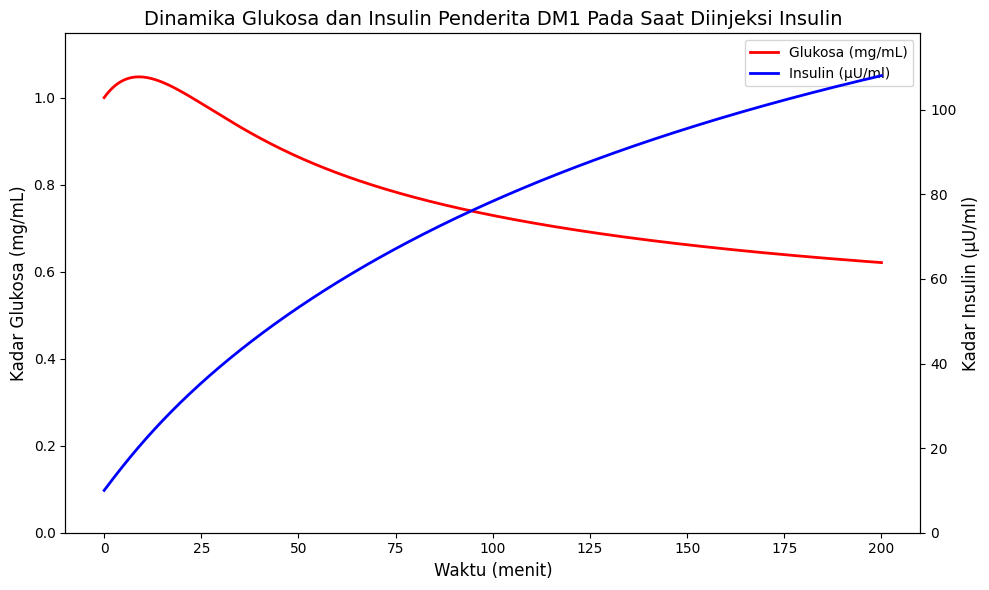

In [349]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 10
gamma = 0.08
theta = 0.00076
sigma = 1.54
beta = 0.0002
epsilon = 0.98

t = np.linspace(0, 200, 3000)
z0 = np.array([100.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()


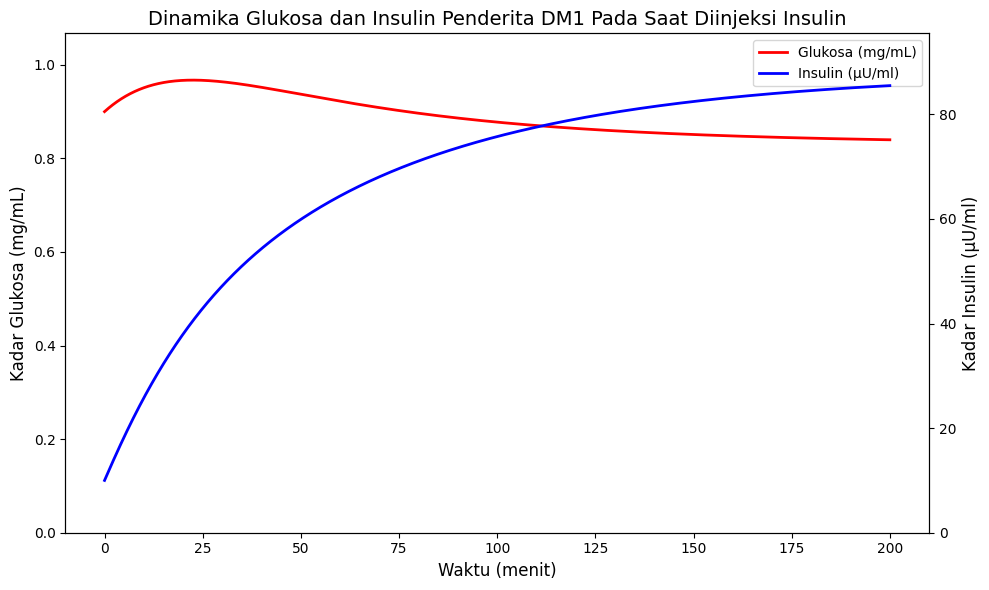

In [340]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter yang dimodifikasi untuk memastikan glukosa tidak turun terlalu rendah
alpha = 4.5  # Meningkatkan alpha untuk meningkatkan produksi glukosa
gamma = 0.04  # Menurunkan gamma untuk memperlambat pemanfaatan glukosa
theta = 0.00016089
sigma = 2.0
beta = 0.0003
epsilon = 0.9

t = np.linspace(0, 200, 3000)
z0 = np.array([90.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

# Plotting grafik
fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()


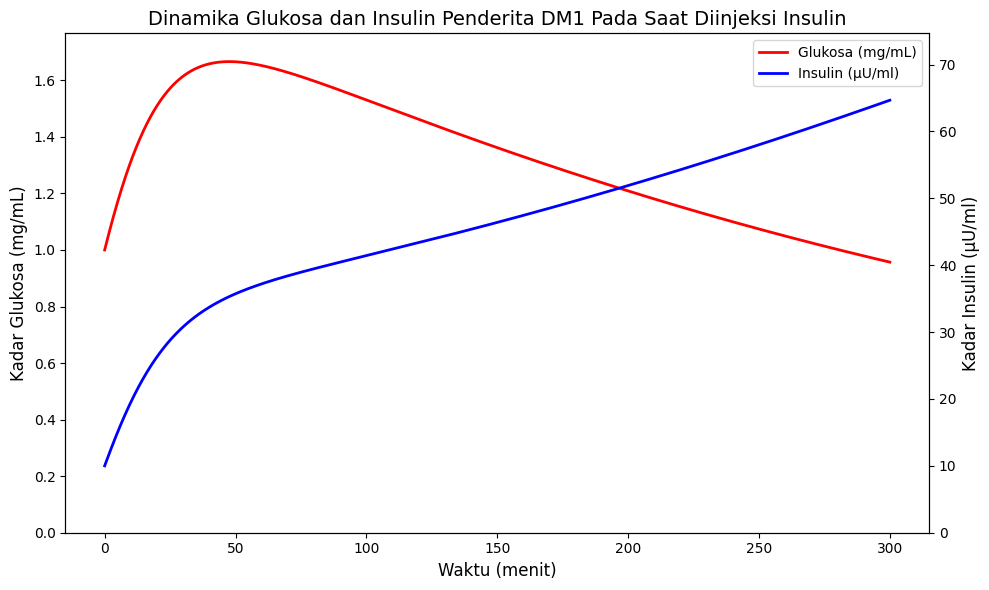

In [341]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 4.5
gamma = 0.0002
theta = 0.00075919
sigma = 1.37
beta = 0.0002
epsilon = 0.98

# Parameter
#alpha = 18.2
#gamma = 0.08
#theta = 0.0009
#sigma = 1.54
#beta = 0.0002
#epsilon = 0.98

t = np.linspace(0, 300, 3000)
z0 = np.array([100.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()

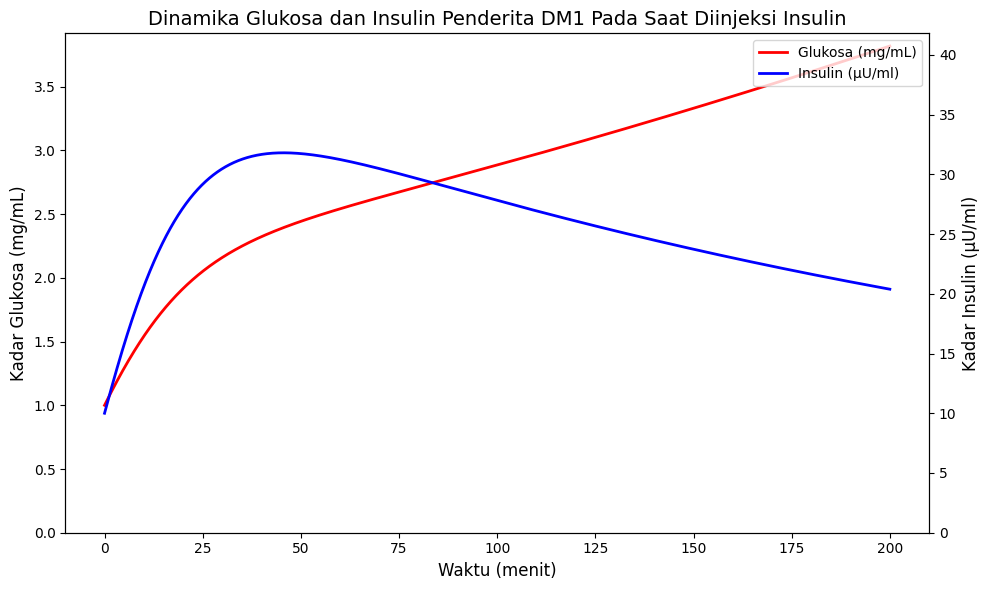

In [346]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 7
gamma = 0.0002
theta = 0.000759
sigma = 1.54
beta = 0.0002
epsilon = 0.98

t = np.linspace(0, 200, 3000)
z0 = np.array([100.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()


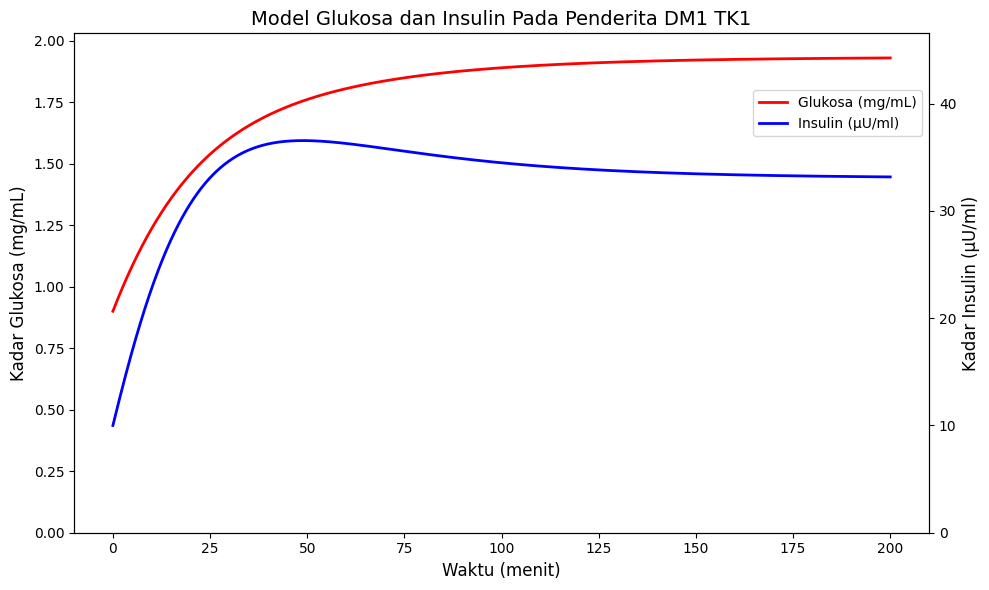

In [385]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 7
gamma = 0.0309
theta = 0.00016089
sigma = 1.4
beta = 0.0003
epsilon = 0.7

t = np.linspace(0, 200, 3000)
z0 = np.array([90.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10, bbox_to_anchor=(1.0, 0.9))

plt.title('Model Glukosa dan Insulin Pada Penderita DM1 TK1', fontsize=14)
plt.tight_layout()
plt.show()

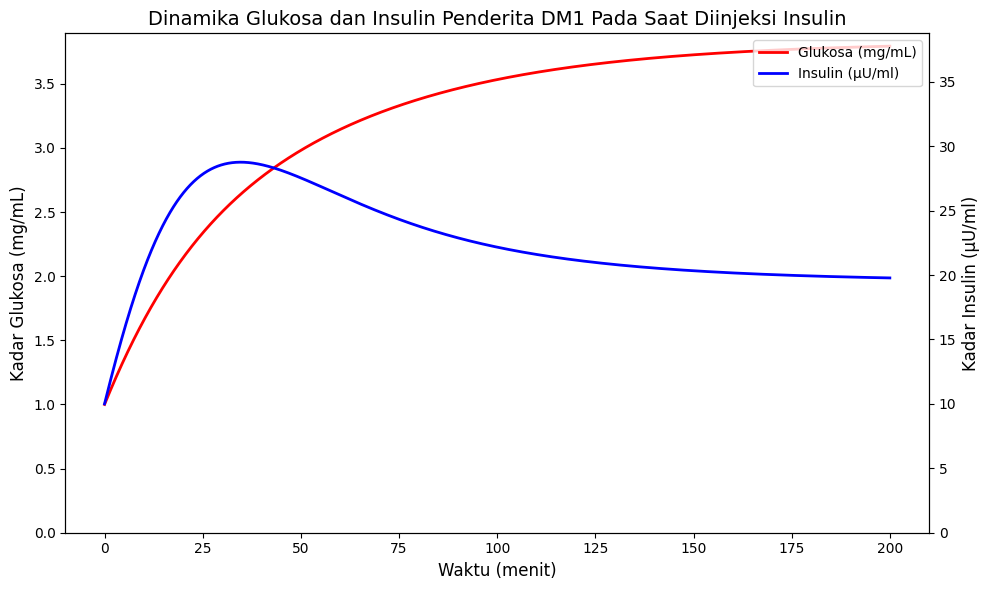

In [415]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 10
gamma = 0.0002
theta = 0.00016089
sigma = 1.54
beta = 0.0002
epsilon = 0.98

t = np.linspace(0, 200, 3000)
z0 = np.array([100.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()


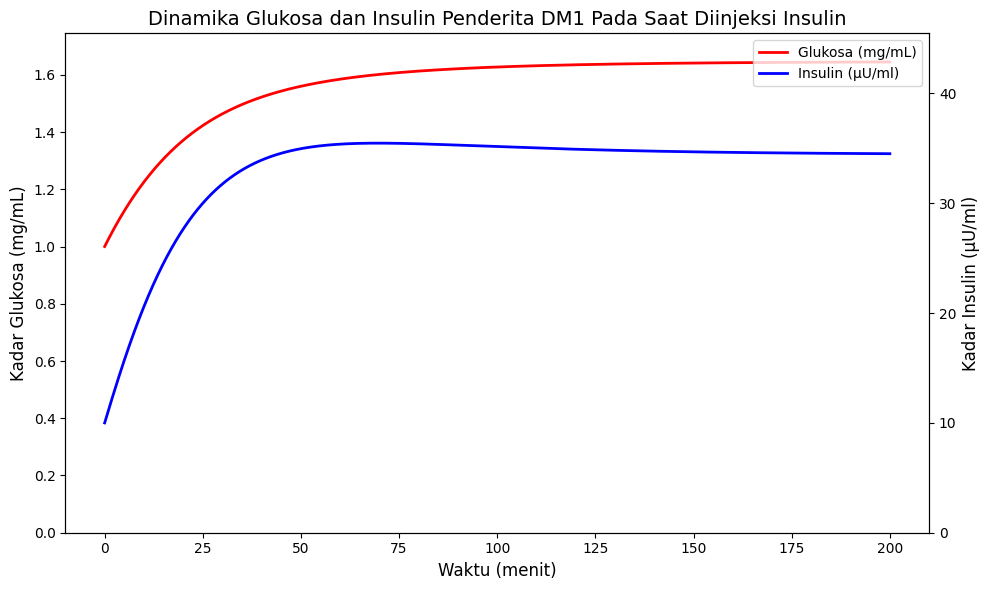

In [409]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z


# Parameter
alpha = 6
gamma = 0.0309
theta = 0.00016089
sigma = 0.9
beta = 0.0003
epsilon = 0.5

t = np.linspace(0, 200, 3000)
z0 = np.array([100.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()


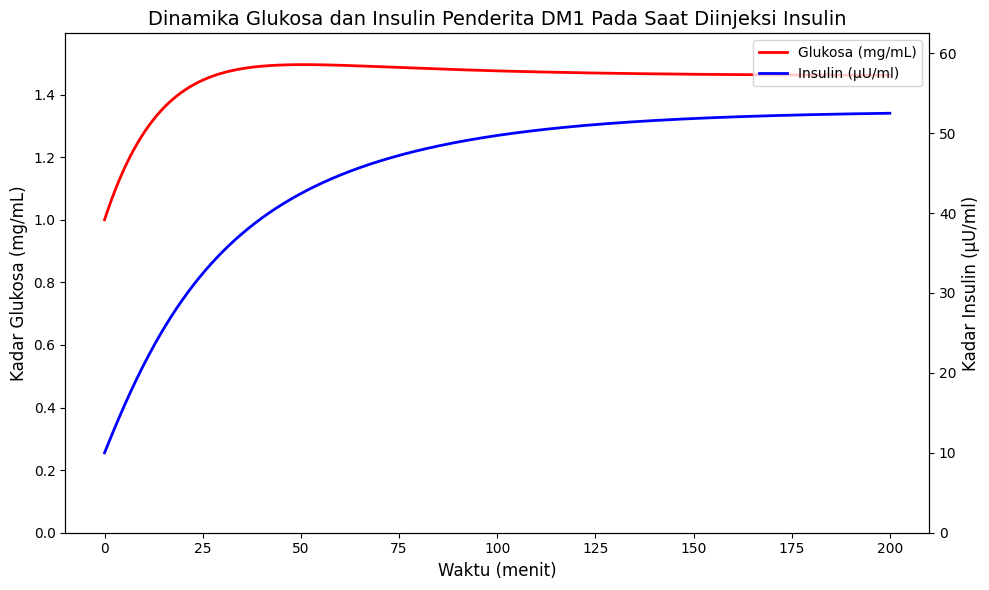

In [499]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 10
gamma = 0.06
theta = 0.00016089
sigma = 1.54
beta = 0.0002
epsilon = 0.98

t = np.linspace(0, 200, 3000)
z0 = np.array([100.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()
